# Regression analyisis
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. For example, the method of ordinary least squares computes the unique line (or hyperplane) that minimizes the sum of squared differences between the true data and that line (or hyperplane). For specific mathematical reasons (see linear regression), this allows the researcher to estimate the conditional expectation (or population average value) of the dependent variable when the independent variables take on a given set of values. Less common forms of regression use slightly different procedures to estimate alternative location parameters (e.g., quantile regression or Necessary Condition Analysis) or estimate the conditional expectation across a broader collection of non-linear models (e.g., nonparametric regression).

In [60]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression

Loading the data

In [77]:


# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(14,3)})

#copy the path of the sample quotes: (to big to put in the git)
#ALEX: 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'
#JULES: ...
#MARIN: ...
#NICO: ...


path_2_data = 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'


#import the dataset sample
df = pd.read_json(path_2_data + 'df_quotes_pol_all_classified.json.bz2',compression="bz2",lines=True)


Here are the available columns for the different regression analysis

In [62]:
df.columns


Index(['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'label', 'aliases', 'date_of_birth',
       'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party',
       'colloquial_NaiveBayes', 'colloquial_contractions'],
      dtype='object')

Quick look at some value inside the dataframe

In [63]:
df.sample(5)

,quoteID,quotation,speaker,qid_unique,date,urls,p1,p2,delta_p,year,...,party,academic_degree,id,candidacy,type,religion,age,bi_party,colloquial_NaiveBayes,colloquial_contractions
166745,2016-05-31-011926,but obviously my campaign slogan is I want to ...,Austin Petersen,Q22007397,2016-05-31 18:39:46,[http://www.huffingtonpost.com/tom-mullen/libe...,0.8305,0.1608,0.6697,2016,...,"[Q558334, Q29468]",None,Q22007397,None,item,[Q7066],40.0,Republican,formal,0
46935,2015-01-15-091307,We are pleased that Attorney General Mills has...,Mary Mayhew,Q30038862,2015-01-15 07:40:28,[http://wgme.com//news/features/top-stories/st...,0.8979,0.1021,0.7958,2015,...,"[Q29552, Q29468]",None,Q30038862,None,item,None,56.0,Republican,formal,0
84624,2015-07-15-085881,or are we a team still between Division Two an...,Joe Kernan,Q1431576,2015-07-15 17:15:47,[http://www.irishtimes.com/sport/gaelic-games/...,0.9501,0.0499,0.9002,2015,...,[Q29552],None,Q1431576,None,item,[Q1841],75.0,Democrat,formal,0
121832,2016-05-21-068221,We acknowledge that there is no proof that US ...,John Kerry,Q22316,2016-05-21 14:52:00,[http://www.telegraph.co.uk/news/2016/05/21/ob...,0.7243,0.2565,0.4678,2016,...,[Q29552],None,Q22316,[Q464075],item,[Q9592],77.0,Democrat,formal,0
471619,2020-02-26-084303,we have to work and expand the World Health Or...,Bernie Sanders,Q359442,2020-02-26 03:07:14,[https://heavy.com/news/2020/02/who-won-democr...,0.8796,0.0701,0.8095,2020,...,"[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268],80.0,Democrat,informal,0


In [64]:
df_pre_reg2 = df[['bi_party','gender','age','colloquial_NaiveBayes', 'colloquial_contractions']]

In [65]:
df_pre_reg2 = df_pre_reg2.replace(to_replace = 'None', value=np.nan).dropna()
print(len(df_pre_reg2))

512074


In [66]:
#df_pre_reg2 = df3[['quotes_number','gender','fraction']]
#df_pre_reg2 = df_pre_reg2.replace(to_replace='None', value=np.nan).dropna()

df_pre_reg2['gender_all'] = df_pre_reg2['gender'].apply(lambda x: x[0]) 
#index_genre = df_pre_reg2[df_pre_reg2["gender_all"].str.contains("Q1052281|Q1097630||Q12964198|Q15145778|Q15145779|Q18116794|Q2449503|Q27679766|Q48270|Q48279")].index

#"Q1052281|Q1097630||Q12964198|Q15145778|Q15145779|Q18116794|Q2449503|Q27679766|Q48270|Q48279"
#'Q6581072|Q6581097'
index1 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q1052281'))]
index2 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q48279'))]
index3 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q48270'))]
index4 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q27679766'))]
index5 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q18116794'))]
index6 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q15145779'))]
index7 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q15145778'))]
index8 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q12964198'))]
index9 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q1097630'))]
index10 = df_pre_reg2.index[(df_pre_reg2["gender_all"].str.contains('Q2449503'))]


df_pre_reg2 = df_pre_reg2.drop(index1)
df_pre_reg2 = df_pre_reg2.drop(index2)
df_pre_reg2 = df_pre_reg2.drop(index3)
df_pre_reg2 = df_pre_reg2.drop(index4)
df_pre_reg2 = df_pre_reg2.drop(index5)
df_pre_reg2 = df_pre_reg2.drop(index6)
df_pre_reg2 = df_pre_reg2.drop(index7)
df_pre_reg2 = df_pre_reg2.drop(index8)
df_pre_reg2 = df_pre_reg2.drop(index9)
df_pre_reg2 = df_pre_reg2.drop(index10)


To avoid too many features the analysis focuses only on the male and female gender. However, few data have to be discarded by applying this filter.

In [67]:
df_pre_reg2['gender'] = df_pre_reg2['gender'].apply(lambda x: x[0])
df_pre_reg2.drop('gender_all', axis=1, inplace=True)
df_pre_reg2['Index'] = df_pre_reg2.index
df_pre_reg2


,bi_party,gender,age,colloquial_NaiveBayes,colloquial_contractions,Index
0,Democrat,Q6581097,46.0,informal,0,0
1,Democrat,Q6581097,46.0,informal,0,1
2,Democrat,Q6581097,46.0,informal,0,2
3,Democrat,Q6581097,46.0,informal,0,3
4,Democrat,Q6581097,46.0,informal,0,4
...,...,...,...,...,...,...
564651,Republican,Q6581097,75.0,informal,0,564651
564652,Republican,Q6581097,64.0,informal,0,564652
564655,Democrat,Q6581097,47.0,informal,0,564655
564656,Republican,Q6581097,59.0,informal,0,564656


In [68]:
df_pre_reg2.colloquial_NaiveBayes[df_pre_reg2.colloquial_NaiveBayes == 'informal'] = 1
df_pre_reg2.colloquial_NaiveBayes[df_pre_reg2.colloquial_NaiveBayes == 'formal'] = 0
df_pre_reg2['colloquial_NaiveBayes'] = df_pre_reg2['colloquial_NaiveBayes'].astype(int)
df_pre_reg2

C:\Users\alexb\AppData\Local\Temp/ipykernel_15992/1476010422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_reg2.colloquial_NaiveBayes[df_pre_reg2.colloquial_NaiveBayes == 'informal'] = 1
C:\Users\alexb\AppData\Local\Temp/ipykernel_15992/1476010422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_reg2.colloquial_NaiveBayes[df_pre_reg2.colloquial_NaiveBayes == 'formal'] = 0


,bi_party,gender,age,colloquial_NaiveBayes,colloquial_contractions,Index
0,Democrat,Q6581097,46.0,1,0,0
1,Democrat,Q6581097,46.0,1,0,1
2,Democrat,Q6581097,46.0,1,0,2
3,Democrat,Q6581097,46.0,1,0,3
4,Democrat,Q6581097,46.0,1,0,4
...,...,...,...,...,...,...
564651,Republican,Q6581097,75.0,1,0,564651
564652,Republican,Q6581097,64.0,1,0,564652
564655,Democrat,Q6581097,47.0,1,0,564655
564656,Republican,Q6581097,59.0,1,0,564656


Normalization of the feature "age"

In [69]:
df_pre_reg2['age'] = (df['age'] - df['age'].mean())/df['age'].std()

Defining the features and outcomes

In [11]:
df_feat = df_pre_reg2[['bi_party','gender','age']]
df_score_nb = df_pre_reg2['colloquial_NaiveBayes']
df_score_contr = df_pre_reg2['colloquial_contractions']

Create one-hot encoding for gender and party

In [12]:
#One-Hot Encoding to represent categorical variables as binary vectors
onehot = pd.get_dummies(df_feat[['bi_party','gender']]).add_suffix('_onehot')
df_feat_os=pd.merge(df_feat,
             onehot,
             left_index=True,
             right_index=True)

df_feat_os.drop('bi_party', axis=1, inplace=True)
df_feat_os.drop('gender', axis=1, inplace=True)
#check of the operation
df_feat_os.head()

,age,bi_party_Democrat_onehot,bi_party_Republican_onehot,gender_Q6581072_onehot,gender_Q6581097_onehot
0,0.284091,1,0,0,1
1,0.284091,1,0,0,1
2,0.284091,1,0,0,1
3,0.284091,1,0,0,1
4,0.284091,1,0,0,1


In [13]:
#the different columns of the dataframe are converted in numpy arrays:
def numpy_helper(df, cols):
    return df[cols].to_numpy()

In [14]:
#Test the function numpy_helper:
cols = df_feat_os.columns
test_helper = numpy_helper(df_feat_os,cols)
assert('('+str(len(df_pre_reg2))+', '+str(len(cols))+')'==str(test_helper.shape))

#Rapid check of the output dimensions:
print('The dataframe of dimension [{},{}] have been converted into a numpy array of dimensions [{}] '.format(len(df_pre_reg2),len(cols),test_helper.shape))

The dataframe of dimension [512017,5] have been converted into a numpy array of dimensions [(512017, 5)] 


## Linear Regression

In [15]:
X_reg = numpy_helper(df_feat_os, cols)

#Create Y naive bayse
y_reg_nb = df_score_nb.to_numpy()

#Split the dataset
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_reg,
                                                                y_reg_nb,
                                                                test_size = 0.3,
                                                                train_size = 0.7,
                                                                random_state = 123)

#Create Y contractions
y_reg_contr = df_score_contr.to_numpy()

#Split the dataset
X_train_contr, X_test_contr, y_train_contr, y_test_contr = train_test_split(X_reg,
                                                                            y_reg_contr,
                                                                            test_size = 0.3,
                                                                            train_size = 0.7,
                                                                            random_state = 123)

Creation and test of the model for naive bayes

In [16]:
#Create of the model:
lin_reg_nb = LinearRegression()

#Train the model 
lin_reg_nb.fit(X_train_nb, y_train_nb)

#Test it
y_predict_nb=lin_reg_nb.predict(X_test_nb)



Contreation and test of the model for contractions

In [17]:
#Create of the model:
lin_reg_contr = LinearRegression()

#Train the model 
lin_reg_contr.fit(X_train_contr, y_train_contr)

#Test it
y_predict_contr=lin_reg_contr.predict(X_test_contr)



In [18]:
#Computation of the R2 score:
print('R2 score 1st linear regression: {:.2}'.format(lin_reg_nb.score(X_test_nb,y_test_nb)))

print('R2 score 1st linear regression: {:.2}'.format(lin_reg_contr.score(X_test_contr,y_test_contr)))

R2 score 1st linear regression: 0.00071
R2 score 1st linear regression: 0.00036


## Logistic regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

In [47]:
#check if outcomes are binary 
print('Possible outcome values for contractions: {}'.format(df_pre_reg2['colloquial_contractions'].unique()))
print('Possible outcome values for contractions: {}'.format(df_pre_reg2['colloquial_NaiveBayes'].unique()))

Possible outcome values for contractions: [0 1]
Possible outcome values for contractions: [1 0]


In [25]:
#One-Hot Encoding to represent categorical variables as binary vectors
onehot = pd.get_dummies(df_pre_reg2[['bi_party','gender']]).add_suffix('_onehot')
df_feat_os2=pd.merge(df_pre_reg2,
             onehot,
             left_index=True,
             right_index=True)

df_feat_os2.drop('bi_party', axis=1, inplace=True)
df_feat_os2.drop('gender', axis=1, inplace=True)

,age,colloquial_NaiveBayes,colloquial_contractions,bi_party_Democrat_onehot,bi_party_Republican_onehot,gender_Q6581072_onehot,gender_Q6581097_onehot
0,0.284091,1,0,1,0,0,1
1,0.284091,1,0,1,0,0,1
2,0.284091,1,0,1,0,0,1
3,0.284091,1,0,1,0,0,1
4,0.284091,1,0,1,0,0,1
...,...,...,...,...,...,...,...
564651,0.613636,1,0,0,1,0,1
564652,0.488636,1,0,0,1,0,1
564655,0.295455,1,0,1,0,0,1
564656,0.431818,1,0,0,1,0,1


In [70]:
df_pre_reg2.gender[df_pre_reg2.gender == 'Q6581072'] = 0
df_pre_reg2.gender[df_pre_reg2.gender == 'Q6581097'] = 1
df_pre_reg2.bi_party[df_pre_reg2.bi_party == 'Democrat'] = 1
df_pre_reg2.bi_party[df_pre_reg2.bi_party == 'Republican'] = 0

C:\Users\alexb\AppData\Local\Temp/ipykernel_15992/1560176052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_reg2.gender[df_pre_reg2.gender == 'Q6581072'] = 0
C:\Users\alexb\AppData\Local\Temp/ipykernel_15992/1560176052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_reg2.gender[df_pre_reg2.gender == 'Q6581097'] = 1
C:\Users\alexb\AppData\Local\Temp/ipykernel_15992/1560176052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,bi_party,gender,age,colloquial_NaiveBayes,colloquial_contractions,Index
0,1,1,-1.389987,1,0,0
1,1,1,-1.389987,1,0,1
2,1,1,-1.389987,1,0,2
3,1,1,-1.389987,1,0,3
4,1,1,-1.389987,1,0,4
...,...,...,...,...,...,...
564651,0,1,0.921984,1,0,564651
564652,0,1,0.045029,1,0,564652
564655,1,1,-1.310264,1,0,564655
564656,0,1,-0.353586,1,0,564656


In [71]:
mod = smf.logit(formula='colloquial_contractions ~  age + bi_party + gender', data=df_pre_reg2)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.406315
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     colloquial_contractions   No. Observations:               512017
Model:                               Logit   Df Residuals:                   512013
Method:                                MLE   Df Model:                            3
Date:                     Mon, 13 Dec 2021   Pseudo R-squ.:               0.0006397
Time:                             18:42:03   Log-Likelihood:            -2.0804e+05
converged:                            True   LL-Null:                   -2.0817e+05
Covariance Type:                 nonrobust   LLR p-value:                 1.914e-57
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7677      0.010   -180.751      0.000     

In [72]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-1.786865,-1.748529
bi_party[T.1],-0.132777,-0.100873
gender[T.1],0.002454,0.040469
age,-0.036544,-0.020719


In [73]:
#sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)


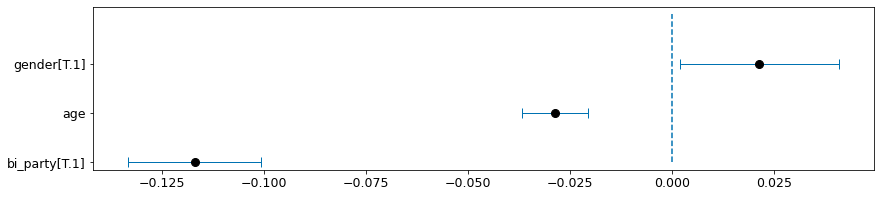

In [85]:
#fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 8,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

### Interpretation:
We can state that
- Age and the political side are significant negative predictors of colloquialism use
- In a lesser extent gender is a significant positive predictors of colloquialism use

Since all predictors are standardized, we can interpret in the following way:
- When all other predictors take mean values, an increase of age by 1 standard deviation (12 year), leads on average to a decrease by 0.0286 of log odds of colloquialism use.



In [124]:
mod_nb = smf.logit(formula='colloquial_NaiveBayes ~  age + bi_party + gender', data=df_pre_reg2)
res_nb = mod_nb.fit()
print(res_nb.summary())

Optimization terminated successfully.
         Current function value: 0.690696
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     colloquial_NaiveBayes   No. Observations:               512017
Model:                             Logit   Df Residuals:                   512013
Method:                              MLE   Df Model:                            3
Date:                   Mon, 13 Dec 2021   Pseudo R-squ.:               0.0005324
Time:                           22:39:33   Log-Likelihood:            -3.5365e+05
converged:                          True   LL-Null:                   -3.5384e+05
Covariance Type:               nonrobust   LLR p-value:                 2.377e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2474      0.007     36.175      0.000       0.234       0.

In [125]:
# feature names
variables_nb = res_nb.params.index

# quantifying uncertainty!

# coefficients
coefficients_nb = res_nb.params.values

# p-values
p_values_nb = res.pvalues

# standard errors
standard_errors_nb = res_nb.bse.values

#confidence intervals
res_nb.conf_int()

,0,1
Intercept,0.234032,0.260844
bi_party[T.1],-0.079005,-0.056782
gender[T.1],-0.123296,-0.096936
age,0.004486,0.015508


In [126]:
#sort them all by coefficients
l1_nb, l2_nb, l3_nb, l4_nb = zip(*sorted(zip(coefficients_nb[1:], variables_nb[1:], standard_errors_nb[1:], p_values_nb[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)


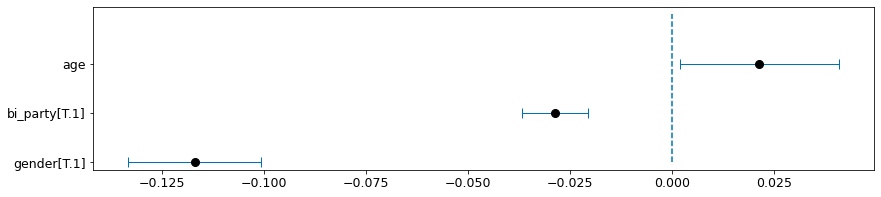

In [127]:
#fancy plotting

plt.errorbar(l1, np.array(range(len(l1_nb))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 8,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1_nb), linestyle = '--')

plt.yticks(range(len(l2_nb)),l2_nb);

Text(0, 0.5, 'log odds')

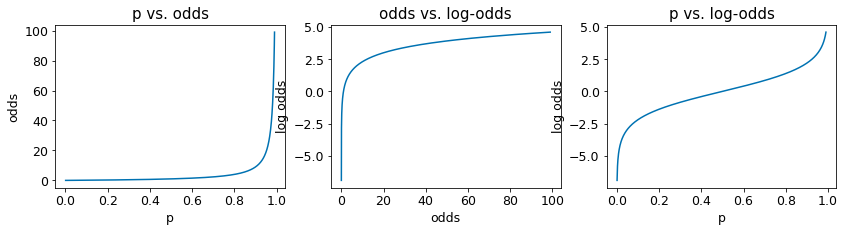

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(14,3))
p = np.linspace(0.001, 0.99, 999)
odds = p/(1-p)
axs[0].set_title("p vs. odds")
axs[0].plot(p, odds)
axs[0].set_xlabel("p")
axs[0].set_ylabel("odds")

axs[1].set_title("odds vs. log-odds")
axs[1].plot(odds, np.log(odds))
axs[1].set_xlabel("odds")
axs[1].set_ylabel("log odds")

axs[2].set_title("p vs. log-odds")
axs[2].plot(p, np.log(odds))
axs[2].set_xlabel("p")
axs[2].set_ylabel("log odds")